# Import and install dependencies 

In [8]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Keypoints using MP Holistic 

In [9]:
mp_holistic = mp.solutions.holistic # holitistic model
mp_drawing = mp.solutions.drawing_utils #drawing utilities 

In [10]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR to RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [11]:
# cv2.cvtColor??
# def draw_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections
    
    #here draw_landmarks is helper function that comes with mediapipe that helps to draw landmarks
    # mp_holistic.FACE_CONNECTION : this maps the various parts of face
    
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 


In [12]:
# opens the OpenCV feed window to capture video
import cv2

cap = cv2.VideoCapture(0)  # videocapture from device value = 0 ie webcam
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # read the feed
        ret, frame = cap.read()  # returns ret and frame

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
        #drawing landmarks
        draw_styled_landmarks(image,results)


        # show to user on screen with frame name 
        cv2.imshow('OpenCv feed', image)

        # breaking gracefully when q key is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # Release the webcam
    cap.release()
    # Close all windows
    cv2.destroyAllWindows()


I0000 00:00:1702128397.461586       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [13]:
results.face_landmarks

landmark {
  x: 0.5209417
  y: 0.58023363
  z: -0.021226175
}
landmark {
  x: 0.5177674
  y: 0.52872974
  z: -0.04670373
}
landmark {
  x: 0.5189245
  y: 0.5431961
  z: -0.022582807
}
landmark {
  x: 0.5080817
  y: 0.48037976
  z: -0.037598856
}
landmark {
  x: 0.5169629
  y: 0.51392174
  z: -0.050520625
}
landmark {
  x: 0.5160976
  y: 0.49384603
  z: -0.048173428
}
landmark {
  x: 0.5142971
  y: 0.44484386
  z: -0.027881071
}
landmark {
  x: 0.45265108
  y: 0.44627923
  z: 0.008110468
}
landmark {
  x: 0.5129926
  y: 0.4117674
  z: -0.024962815
}
landmark {
  x: 0.5121455
  y: 0.39241856
  z: -0.02857312
}
landmark {
  x: 0.5084296
  y: 0.31501448
  z: -0.02403958
}
landmark {
  x: 0.52136946
  y: 0.5875654
  z: -0.01959286
}
landmark {
  x: 0.5216834
  y: 0.59235275
  z: -0.016180377
}
landmark {
  x: 0.521895
  y: 0.59366465
  z: -0.011889291
}
landmark {
  x: 0.52212775
  y: 0.59644186
  z: -0.0102688
}
landmark {
  x: 0.5224229
  y: 0.6024823
  z: -0.011346943
}
landmark {
  x: 0

In [14]:
len(results.pose_landmarks.landmark)

33

In [15]:
frame #last frame extracted from webcam

array([[[141, 185, 201],
        [140, 184, 200],
        [138, 183, 199],
        ...,
        [212, 231, 229],
        [209, 228, 226],
        [211, 230, 228]],

       [[137, 181, 197],
        [140, 184, 200],
        [138, 183, 199],
        ...,
        [212, 231, 229],
        [209, 228, 226],
        [211, 230, 228]],

       [[138, 183, 199],
        [137, 181, 197],
        [137, 181, 197],
        ...,
        [211, 230, 228],
        [210, 229, 227],
        [211, 230, 228]],

       ...,

       [[ 28,  58,  70],
        [ 34,  63,  76],
        [ 31,  59,  75],
        ...,
        [ 46,  63, 102],
        [ 52,  68, 109],
        [ 46,  62, 104]],

       [[ 25,  57,  68],
        [ 33,  65,  76],
        [ 37,  66,  79],
        ...,
        [ 47,  61, 101],
        [ 44,  57,  99],
        [ 50,  63, 105]],

       [[ 24,  56,  66],
        [ 26,  58,  69],
        [ 34,  63,  76],
        ...,
        [ 47,  61, 101],
        [ 35,  48,  90],
        [ 47,  61, 102]]

In [16]:
results

mediapipe.python.solution_base.SolutionOutputs

In [17]:
draw_styled_landmarks(frame,results) #applies landmarks to the frame we captured

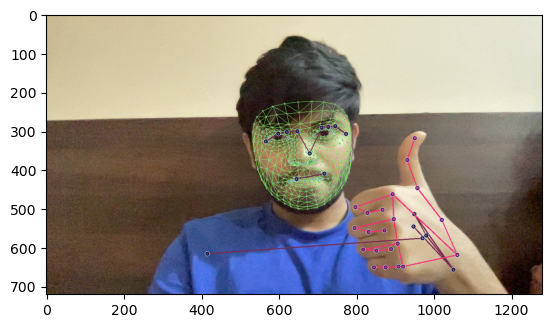

In [18]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)) # doing color conversion and displaying the last frame captured

#  Extract Keypoint Values

In [7]:
len(results.pose_landmarks.landmark)


NameError: name 'results' is not defined

In [15]:
pose = [] #created an empty placeholder array
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [16]:
len(pose)

33

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

#here we checked size of flattened array for pose , face , lh and rh and did error handling if any of them doesn't show in the face....and it will have a value of zero array

Checking what is the array we get for given captured frame for face, pose, right hand, left hand|

In [18]:
face

array([ 0.54222441,  0.48479196, -0.02470233, ...,  0.60322517,
        0.34685421,  0.01331089])

In [19]:
pose

array([ 5.51892638e-01,  4.09209371e-01, -7.32104063e-01,  9.99981523e-01,
        5.74045718e-01,  3.31023186e-01, -6.89313471e-01,  9.99948502e-01,
        5.86641431e-01,  3.31047714e-01, -6.89112902e-01,  9.99941885e-01,
        5.98113358e-01,  3.31160963e-01, -6.89219654e-01,  9.99937236e-01,
        5.21670997e-01,  3.34445268e-01, -6.79337382e-01,  9.99956965e-01,
        5.03008962e-01,  3.35582793e-01, -6.78727031e-01,  9.99957860e-01,
        4.85523850e-01,  3.37570369e-01, -6.78661168e-01,  9.99962866e-01,
        6.18554950e-01,  3.65549356e-01, -3.71647835e-01,  9.99941647e-01,
        4.64208275e-01,  3.79912943e-01, -2.97092855e-01,  9.99967277e-01,
        5.78756809e-01,  4.86824870e-01, -6.14477158e-01,  9.99971688e-01,
        5.18896222e-01,  4.93937314e-01, -5.95655143e-01,  9.99974787e-01,
        7.44125247e-01,  7.61382282e-01, -1.83433846e-01,  9.99457479e-01,
        3.62216890e-01,  7.57798016e-01, -1.82812735e-01,  9.99783933e-01,
        8.50080490e-01,  

In [20]:
lh #left hand

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
rh #left hand

array([ 2.70009995e-01,  7.52612829e-01, -2.14675921e-07,  2.87540644e-01,
        6.42719090e-01, -7.62318401e-03,  3.23890090e-01,  5.25810599e-01,
       -2.17637941e-02,  3.42258722e-01,  4.39472079e-01, -3.49838547e-02,
        3.43398362e-01,  3.65525991e-01, -4.50770892e-02,  3.45809966e-01,
        5.55007815e-01, -4.15662155e-02,  4.21306431e-01,  5.63457429e-01,
       -6.46301284e-02,  4.02533174e-01,  5.82458913e-01, -7.37150013e-02,
        3.73589337e-01,  5.83753288e-01, -7.71051347e-02,  3.49191219e-01,
        6.31020963e-01, -4.89573032e-02,  4.29466277e-01,  6.33643270e-01,
       -6.35004416e-02,  4.07366931e-01,  6.45609856e-01, -5.85883372e-02,
        3.77199531e-01,  6.45808995e-01, -5.60979135e-02,  3.51320773e-01,
        7.08249390e-01, -5.59962988e-02,  4.22363341e-01,  7.02978611e-01,
       -6.52342439e-02,  3.99396986e-01,  7.11480618e-01, -4.80142087e-02,
        3.71261388e-01,  7.13877141e-01, -3.73627879e-02,  3.51335913e-01,
        7.81180203e-01, -

In [82]:
# let's build a function that does above tasks for us

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh]) # we concatenate all the extracted keypoints from differents parts
    
    

In [83]:
extract_keypoints(results).shape

(1662,)

# Setup folders for Collection

In [84]:
DATA_PATH = os.path.join('MP_Data') # path for exported data

actions = np.array(['hello','thanks','iloveyou']) # actions we're going to detect we store each one in np array

no_sequences = 30 # contains 30 videos of data
sequence_length = 30 # each video being 30 frames

now what we'll do is that we would create folders for storing each of our action i.e hello , thanks , iloveyou <br>
then in each folder : 0-29 frames


In [85]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence))) # we're making these directories here
        except:
            pass # if it already exists
        
    

# Collect Keypoint values for training and testing

In [26]:
# import cv2

# cap = cv2.VideoCapture(0)  # videocapture from device value = 0 ie webcam
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    
#     for action in actions: # loop through actions
#         for sequence in range(no_sequences): # loop through sequences aka videos
#              for frame_num in range(sequence_length): # loop through frames in each video
                    
            
#                 # read the feed
#                 ret, frame = cap.read()  # returns ret and frame

#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)

#                 #drawing landmarks
#                 draw_landmarks(image,results)
                
#                 # Apply wait logic
#                 if frame_num== 0:
#                     cv2.putText(image, 'STARTING COLLECTION', (120, 200),
#                     cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence)(15,12),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(2000)
#                 else:
#                     cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                    
                    
#                 # show to user on screen with frame name 
#                 cv2.imshow('OpenCV feed', image)
                
#                 # Export new keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
#                 np.save(npy_path,keypoints)
                

#                  # breaking gracefully when q key is pressed
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                         break

   

In [27]:

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1702117595.660822       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1


In [86]:
 # Release the webcam
cap.release()
    # Close all windows
cv2.destroyAllWindows()


# Preprocess data and create labels and features

In [87]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [88]:
label_map = {label:num for num, label in enumerate(actions)} 
#dictionary mapping action labels to their corresponding indexes

In [89]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [90]:
sequences, labels = [], [] # blank array: 
                           #sequences: contains feature data (x_data)
                           # labels : contains the label for data(y_data)
# Iterate through each action in the actions list
for action in actions:
    # Loop through a specified number of sequences for the current action
    for sequence in range(no_sequences):
        # Create an empty list to store the feature data for this sequence
        window = []

        # Loop through each frame within the sequence length
        for frame_num in range(sequence_length):
            # Load the feature data for the current frame
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))

            # Append the loaded data to the window list
            window.append(res)

        # Append the complete window of feature data to the sequences list
        sequences.append(window)

        # Append the corresponding action label (mapped from label_map) to the labels list
        labels.append(label_map[action])




FileNotFoundError: [Errno 2] No such file or directory: 'MP_Data/hello/0/0.npy'

In [33]:
np.array(sequences).shape

(180, 30, 1662)

In [34]:
np.array(labels).shape

(180,)

In [35]:
X = np.array(sequences)

In [36]:
X

array([[[ 0.57356089,  0.44563973, -0.70201737, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.56209594,  0.44580561, -0.72784662, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.55382407,  0.44578996, -0.77329826, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.55597246,  0.40644485, -0.67469847, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.555897  ,  0.39996609, -0.68329036, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.55580568,  0.38977072, -0.7235797 , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.55645221,  0.38449723, -0.68293488, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.57182914,  0.37037289, -0.71656597, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.57906228,  0.3642346 , -0.59642267, ..., -0.12062564,
          0.52867734, -0.04359   ],
        ...,
        [ 0.55669081,  0.36548433, -0.7002787 , ...,  

In [37]:
y = to_categorical(labels).astype(int)

In [38]:
y.shape

(180, 6)

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05)

In [40]:
X_test.shape

(9, 30, 1662)

In [41]:
X_train.shape

(171, 30, 1662)

# Build and Train our LSTM Network

In [1]:
from tensorflow.keras.models import Sequential # Helps to build a Sequential neural Network
from tensorflow.keras.layers import LSTM, Dense #
from tensorflow.keras.callbacks import TensorBoard # Helps to monitor our model as it's training

In [5]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir= log_dir)

In [6]:
X.shape

NameError: name 'X' is not defined

In [3]:
# lstm created

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
# fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) # Here the softmax function would give the array of possibilities for each action that would add upto 1 (output would have 6 categories for 6 actions we've defined)


NameError: name 'actions' is not defined

## Note: Here we used LSTM with mediapipe for the following reasons <br>
1.less data required (30 * 30)<br>
2. Faster to train <br>
3. Faster detection

We could've also used CNN and then lstm , but that would've required lot more data and would've been computationally more taxing ....and also the prediction would've been slower.

In [57]:
# model compilation
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])
# multiclass classification model : categorical_crossentropy
# metrics helps us see model accuracy while training

In [58]:
model.fit(X_train,y_train,epochs=2000,callbacks=[tb_callback])

Epoch 1/2000
6/6 [==============================] - 3s 67ms/step - loss: 1.9417 - categorical_accuracy: 0.1696
Epoch 2/2000
6/6 [==============================] - 0s 44ms/step - loss: 1.7950 - categorical_accuracy: 0.0994
Epoch 3/2000
6/6 [==============================] - 0s 42ms/step - loss: 1.7757 - categorical_accuracy: 0.2632
Epoch 4/2000
6/6 [==============================] - 0s 43ms/step - loss: 1.6952 - categorical_accuracy: 0.3626
Epoch 5/2000
6/6 [==============================] - 0s 58ms/step - loss: 1.5243 - categorical_accuracy: 0.3275
Epoch 6/2000
6/6 [==============================] - 0s 67ms/step - loss: 1.6985 - categorical_accuracy: 0.3333
Epoch 7/2000
6/6 [==============================] - 0s 49ms/step - loss: 1.6540 - categorical_accuracy: 0.3392
Epoch 8/2000
6/6 [==============================] - 0s 52ms/step - loss: 1.5927 - categorical_accuracy: 0.3743
Epoch 9/2000
6/6 [==============================] - 0s 64ms/step - loss: 1.4487 - categorical_accuracy: 0.3392
E

6/6 [==============================] - 0s 53ms/step - loss: 6.8256 - categorical_accuracy: 0.3041
Epoch 75/2000
6/6 [==============================] - 0s 55ms/step - loss: 1.9984 - categorical_accuracy: 0.1462
Epoch 76/2000
6/6 [==============================] - 0s 54ms/step - loss: 1.8151 - categorical_accuracy: 0.1637
Epoch 77/2000
6/6 [==============================] - 0s 57ms/step - loss: 1.7901 - categorical_accuracy: 0.1579
Epoch 78/2000
6/6 [==============================] - 0s 66ms/step - loss: 1.7254 - categorical_accuracy: 0.1520
Epoch 79/2000
6/6 [==============================] - 0s 72ms/step - loss: 1.9194 - categorical_accuracy: 0.2047
Epoch 80/2000
6/6 [==============================] - 1s 74ms/step - loss: 1.8182 - categorical_accuracy: 0.1696
Epoch 81/2000
6/6 [==============================] - 0s 61ms/step - loss: 1.8175 - categorical_accuracy: 0.1696
Epoch 82/2000
6/6 [==============================] - 0s 60ms/step - loss: 1.8074 - categorical_accuracy: 0.1696
Epoch 

6/6 [==============================] - 0s 63ms/step - loss: 0.5042 - categorical_accuracy: 0.8596
Epoch 147/2000
6/6 [==============================] - 0s 69ms/step - loss: 0.5180 - categorical_accuracy: 0.8187
Epoch 148/2000
6/6 [==============================] - 0s 54ms/step - loss: 1.6484 - categorical_accuracy: 0.4152
Epoch 149/2000
6/6 [==============================] - 0s 56ms/step - loss: 1.4879 - categorical_accuracy: 0.3567
Epoch 150/2000
6/6 [==============================] - 0s 53ms/step - loss: 1.4614 - categorical_accuracy: 0.2573
Epoch 151/2000
6/6 [==============================] - 0s 54ms/step - loss: 1.0809 - categorical_accuracy: 0.5088
Epoch 152/2000
6/6 [==============================] - 0s 50ms/step - loss: 1.0998 - categorical_accuracy: 0.4444
Epoch 153/2000
6/6 [==============================] - 0s 52ms/step - loss: 0.9153 - categorical_accuracy: 0.6140
Epoch 154/2000
6/6 [==============================] - 0s 61ms/step - loss: 0.8396 - categorical_accuracy: 0.748

6/6 [==============================] - 0s 54ms/step - loss: 0.5944 - categorical_accuracy: 0.8421
Epoch 219/2000
6/6 [==============================] - 0s 56ms/step - loss: 0.5170 - categorical_accuracy: 0.8830
Epoch 220/2000
6/6 [==============================] - 0s 54ms/step - loss: 0.5008 - categorical_accuracy: 0.8596
Epoch 221/2000
6/6 [==============================] - 0s 55ms/step - loss: 0.4788 - categorical_accuracy: 0.8830
Epoch 222/2000
6/6 [==============================] - 0s 53ms/step - loss: 0.4431 - categorical_accuracy: 0.8596
Epoch 223/2000
6/6 [==============================] - 0s 57ms/step - loss: 0.4233 - categorical_accuracy: 0.8889
Epoch 224/2000
6/6 [==============================] - 0s 56ms/step - loss: 0.3797 - categorical_accuracy: 0.8655
Epoch 225/2000
6/6 [==============================] - 0s 59ms/step - loss: 0.3537 - categorical_accuracy: 0.9006
Epoch 226/2000
6/6 [==============================] - 0s 63ms/step - loss: 0.3350 - categorical_accuracy: 0.900

KeyboardInterrupt: 

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 6)                 198       
                                                                 
Total params: 596774 (2.28 MB)
Trainable params: 59677

# Make Predictions

In [60]:
model.predict(X_test)

1/1 [==============================] - 0s 415ms/step


array([[2.08810001e-04, 3.92276887e-03, 1.46607431e-02, 9.80797589e-01,
        4.06936742e-04, 3.04856098e-06],
       [1.09882130e-05, 1.48599365e-05, 3.52611810e-01, 7.54107833e-02,
        2.88697809e-01, 2.83253819e-01],
       [1.00000000e+00, 7.40545462e-29, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.98017285e-03, 9.89907980e-01, 6.71439460e-10, 1.11339948e-04,
        3.97186795e-07, 1.64045559e-08],
       [1.04861738e-05, 3.80666097e-05, 8.22942555e-01, 1.73962086e-01,
        2.76820757e-03, 2.78665451e-04],
       [1.00000000e+00, 2.59116468e-28, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.58263957e-15, 0.00000000e+00, 8.65392177e-22,
        1.01909323e-30, 3.12248817e-22],
       [1.00000000e+00, 7.40545462e-29, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.05606414e-05, 3.66837630e-05, 8.24225307e-01, 1.72334149e-01,
        3.06628551e-03, 

In [61]:
res = model.predict(X_test)

1/1 [==============================] - 0s 22ms/step


In [62]:
res[0] # the these are the categorical probablities of each action and they should add upto= 1

array([2.0881000e-04, 3.9227689e-03, 1.4660743e-02, 9.8079759e-01,
       4.0693674e-04, 3.0485610e-06], dtype=float32)

In [63]:
np.sum(res[0]) # sum is 1

0.9999999

In [64]:
actions[np.argmax(res[0])] #here the prediction is happy with 0.98 probability 

'happy'

In [66]:
actions[np.argmax(y_test[0])] # it's accurately predicting happy

'happy'

# Save the model weights

In [67]:
model.save('action.h5') # this saves the weights that helped us achieve this accuracy

/Users/abhishekthorat/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [74]:
del model

In [95]:
model.load_weights('action.h5')

 # Evaluation using Confusion Matrix and Accuracy

In [68]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [69]:
# let's make some predictions
yhat = model.predict(X_test)

1/1 [==============================] - 0s 20ms/step


In [70]:
yhat

array([[2.08810001e-04, 3.92276887e-03, 1.46607431e-02, 9.80797589e-01,
        4.06936742e-04, 3.04856098e-06],
       [1.09882130e-05, 1.48599365e-05, 3.52611810e-01, 7.54107833e-02,
        2.88697809e-01, 2.83253819e-01],
       [1.00000000e+00, 7.40545462e-29, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.98017285e-03, 9.89907980e-01, 6.71439460e-10, 1.11339948e-04,
        3.97186795e-07, 1.64045559e-08],
       [1.04861738e-05, 3.80666097e-05, 8.22942555e-01, 1.73962086e-01,
        2.76820757e-03, 2.78665451e-04],
       [1.00000000e+00, 2.59116468e-28, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.58263957e-15, 0.00000000e+00, 8.65392177e-22,
        1.01909323e-30, 3.12248817e-22],
       [1.00000000e+00, 7.40545462e-29, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.05606414e-05, 3.66837630e-05, 8.24225307e-01, 1.72334149e-01,
        3.06628551e-03, 

In [71]:
ytrue = np.argmax(y_test,axis=1).tolist()
yhat = np.argmax(yhat,axis=0).tolist()


# running this converts the oredictions from their one-hot encoded representation to a categorical label e.g. 0,1 or 2 as opposed to [1,0,0], [0,1,0] or [0,0,1]

# Real time test

In [72]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [98]:
import cv2

# new Detection variables
sequence = []
sentence = []
threshold = 0.4


cap = cv2.VideoCapture(0)  # videocapture from device value = 0 ie webcam
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # read the feed
        ret, frame = cap.read()  # returns ret and frame

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        #drawing landmarks
        draw_styled_landmarks(image,results)
        
        # Prediction Logic
        keypoints = extract_keypoints(results) # extracting keypoints using the function we created
        sequence.append(keypoints) # appending the keypoints to the sequence 
        sequence = sequence[-30:] # because we want previous 30 frames to make predictions
        
        if len(sequence)==30:
            res = model.predict(np.expand_dims(sequence,axis=0 ))[0] # here the we're expanding the dims of single input to (1,30,1662) from (30,1662)
            
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

#             # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)


        # show to user on screen with frame name 
        cv2.imshow('OpenCv feed', image)

        # breaking gracefully when q key is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # Release the webcam
    cap.release()
    # Close all windows
    cv2.destroyAllWindows()

I0000 00:00:1702127502.976068       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1


1/1 [==============================] - 0s 91ms/step
hello
1/1 [==============================] - 0s 18ms/step
hello
1/1 [==============================] - 0s 15ms/step
hello
1/1 [==============================] - 0s 19ms/step
hello
1/1 [==============================] - 0s 18ms/step
hello
1/1 [==============================] - 0s 18ms/step
hello
1/1 [==============================] - 0s 17ms/step
hello
1/1 [==============================] - 0s 18ms/step
hello
1/1 [==============================] - 0s 17ms/step
hello
1/1 [==============================] - 0s 16ms/step
hello
1/1 [==============================] - 0s 16ms/step
hello
1/1 [==============================] - 0s 16ms/step
hello
1/1 [==============================] - 0s 16ms/step
hello
1/1 [==============================] - 0s 16ms/step
hello
1/1 [==============================] - 0s 16ms/step
hello
1/1 [==============================] - 0s 16ms/step
hello
1/1 [==============================] - 0s 17ms/step
hello
1/1 [=========

1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 18ms/step
iloveyou
1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 18ms/step
iloveyou
1/1 [==============================] - 0s 17ms/step
thanks
1/1 [==============================] - 0s 17ms/step
thanks
1/1 [==============================] - 0s 18ms/step
thanks
1/1 [==============================] - 0s 19ms/step
thanks
1/1 [==============================] - 0s 18ms/step
thanks
1/1 [==============================] - 0s 17ms/step
thanks
1/1 [==============================] - 0s 17ms/step
thanks
1/1 [==============================] - 0s 17ms/step
thanks
1/1 [==============================] - 0s 17ms/step
thanks
1/1 [==============================] - 0s 19ms/step
thanks
1/1 [==============================] - 0s 18ms/step
thanks
1/1 [==============================] - 0s 19ms/step
thanks
1/1 [==============================] - 0s 20ms/s